<a href="https://colab.research.google.com/github/ItanuRomero/financial-math/blob/main/valor_presente_liquido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valor presente líquido

Vamos primeiro considerar o cálculo do valor presente liquido, que considera taxa, investimento e uma lista de valores, de onde podemos retirar o período

In [1]:
def calculo_valor_presente_liquido(valores: list, taxa: float, investimento: float):
  soma = 0
  for periodo in range(1, len(valores) + 1):
    soma += valores[periodo - 1] / ((1 + taxa) ** periodo)
  return soma - investimento

Para calibrar a função, vamos adicionar o exemplo feito em aula

In [2]:
calculo_valor_presente_liquido([250000, 320000, 380000, 280000], 0.2, 750000)

35493.82716049394

1. Uma empresa está avaliando um investimento em uma nova unidade de negócios. O
valor a ser investido no momento zero atinge `$ 1.000.000,00` prevendo-se os seguintes fluxos de caixa ao final dos próximos 4 anos: `$150.000,00, $200.000,00, $900.000,00 e $ 1.100.000,00`.
  
  Admitindo que a empresa tenha definido em 20% ao ano a taxa de desconto dos fluxos
  esperados de caixa, determinar o valor presente líquido.
  - Qual o valor presente dos benefícios de caixa do investimento, para a taxa de
  atratividade de 20% a.a.
  - Índice de lucratividade (IL) e taxa de rentabilidade (TR)
  - Utilizando o seu programa, obtenha o IRR.

In [3]:
calculo_valor_presente_liquido([150000, 200000, 900000, 1100000], 0.2, 1000000)

315200.61728395056

In [4]:
def calculo_indice_de_lucratividade(valores: list, taxa: float, investimento: float):
  valor_presente = 0
  for periodo in range(1, len(valores) + 1):
    valor_presente += valores[periodo - 1] / ((1 + taxa) ** periodo)
  return valor_presente / investimento

In [5]:
def calculo_taxa_de_rentabilidade(valores: list, taxa: float, investimento: float):
  valor_presente_liquido = calculo_valor_presente_liquido(valores, taxa, investimento)
  return valor_presente_liquido / investimento

In [6]:
!pip install numpy_financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# para calcular o irr, podemos trazer o numpy_financial
import numpy_financial as npf
def calculo_taxa_interna_de_retorno(valores: list, investimento: float):
  taxa = round(npf.irr([-investimento] + valores), 8)
  return taxa

In [8]:
calculo_indice_de_lucratividade([150000, 200000, 900000, 1100000], 0.2, 1000000)

1.3152006172839505

In [9]:
calculo_taxa_de_rentabilidade([150000, 200000, 900000, 1100000], 0.2, 1000000)

0.31520061728395055

In [10]:
taxa_interna_de_retorno = calculo_taxa_interna_de_retorno([150000, 200000, 900000, 1100000], 1000000)
taxa_interna_de_retorno

0.31211764

In [11]:
# Para tirar a prova do cálculo da taxa interna, podemos usar a função de valor 
# presente liquido, esperando um valor próximo a zero se utilizarmos a taxa acima
round(calculo_valor_presente_liquido([150000, 200000, 900000, 1100000], taxa_interna_de_retorno, 1000000), 1)

0.0

Admita três projetos de investimento com as seguintes estimativas de fluxos de caixa: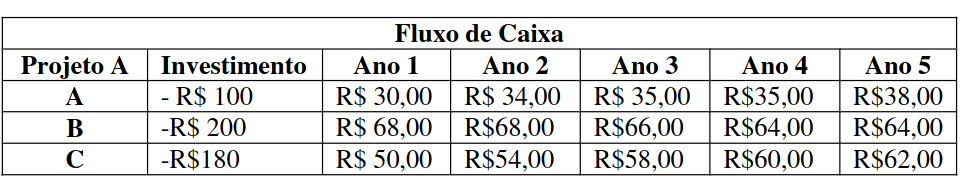

As alternativas de investimento são independentes, isto é, não há restrições de serem
aceitas ao mesmo tempo desde que haja atratividade econômica. A taxa de retorno
requerida é de 18% a.a. Determinar os resultados pelos métodos de análise de
investimento: NPV, IRR, IL e TR.

In [29]:
# Para simplificar, utilizaremos o numpy financial, numpy e pandas
import pandas as pd
import numpy as np
# e vamos limpar os avisos de atualização
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# E vamos inicializar as variáveis
projeto_A = np.array([-100, 30, 34, 35, 35, 38])
projeto_B = np.array([-200, 68, 68, 66, 64, 64])
projeto_C = np.array([-180, 50, 54, 58, 60, 62])
TAXA = 0.18

In [48]:
# E inicializar a tabela
df = pd.DataFrame(columns=['NPV', 'IRR', 'IL', 'TR', 'Decisão'])
# inserindo os valores
for projeto in [projeto_A, projeto_B, projeto_C]:
  npv = npf.npv(TAXA, projeto)
  irr = npf.irr(projeto)
  il = calculo_indice_de_lucratividade(projeto[1:], TAXA, -projeto[0])
  tr = calculo_taxa_de_rentabilidade(projeto[1:], TAXA, -projeto[0])
  # Agora podemos colocar a decisão, mas acredito que seja simples, considerando
  # que se o IL for menor que 1, o TR for menor que 0, ou o IRR for menor que a taxa
  # utilizada, ou o NPV sendo negativo, o investimento não valerá a pena.
  # o qual é o caso do projeto C
  decisao = input(
      f'Considerando os valores: NPV {round(npv, 2)}, ' \
      f'IL {round(il, 2)}, TR {round(tr, 2)} e IRR {round(irr, 2)}, ' \
      'qual a decisão? '
      )
  nova_linha = {
      'NPV': npv, 'IRR': irr, 'IL': il, 'TR': tr, 'Decisão': decisao
  }
  df = df.append(nova_linha, ignore_index=True)

Considerando os valores: NPV 5.81, IL 1.06, TR 0.06 e IRR 0.2, qual a decisão? Positiva
Considerando os valores: NPV 7.62, IL 1.04, TR 0.04 e IRR 0.2, qual a decisão? Positiva
Considerando os valores: NPV -5.5, IL 0.97, TR -0.03 e IRR 0.17, qual a decisão? Negativa


In [49]:
df

,NPV,IRR,IL,TR,Decisão
0,5.806841,0.204440,1.058068,0.058068,Positiva
1,7.618775,0.196929,1.038094,0.038094,Positiva
2,-5.496465,0.166961,0.969464,-0.030536,Negativa
